In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import metrics
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
import seaborn
%matplotlib inline

In [3]:
df_math = pd.read_csv('/Users/ishanhanda/Downloads/student/student-mat.csv', sep = ';')
df_por = pd.read_csv('/Users/ishanhanda/Downloads/student/student-por.csv', sep = ';')
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [4]:
df_math.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

### Merge and clean data

In [5]:
df = pd.merge(df_math, df_por, how = 'outer')

#Create binary 0-1 for select columns
df['rural'] = (df['address'] == 'R').astype(int)
df = df.drop(['address'], axis = 1)
df['P_apart'] = (df['Pstatus'] == 'A').astype(int)
df = df.drop(['Pstatus'], axis = 1)
df['school_GP'] = (df['school'] == 'GP').astype(int)
df = df.drop(['school'], axis = 1)
df['female'] = (df['sex'] == 'F').astype(int)
df = df.drop(['sex'], axis = 1)
df['famsize_bin'] = (df['famsize'] == 'LE3').astype(int)
df = df.drop(['famsize'], axis = 1)

df['guardian_mother'] = (df['guardian'] == 'mother').astype(int)
df['guardian_father'] = (df['guardian'] == 'father').astype(int)
df = df.drop(['guardian'], axis = 1)

df['Mjob_at_home'] = (df['Mjob'] == 'at_home').astype(int)
df['Mjob_health'] = (df['Mjob'] == 'health').astype(int)
df['Mjob_teacher'] = (df['Mjob'] == 'teacher').astype(int)
df['Mjob_services'] = (df['Mjob'] == 'services').astype(int)
df = df.drop(['Mjob'], axis = 1)

df['Fjob_at_home'] = (df['Fjob'] == 'at_home').astype(int)
df['Fjob_health'] = (df['Fjob'] == 'health').astype(int)
df['Fjob_teacher'] = (df['Fjob'] == 'teacher').astype(int)
df['Fjob_services'] = (df['Fjob'] == 'services').astype(int)
df = df.drop(['Fjob'], axis = 1)

df['reason_home'] = (df['reason'] == 'home').astype(int)
df['reason_reputation'] = (df['reason'] == 'reputation').astype(int)
df['reason_course'] = (df['reason'] == 'course').astype(int)
df = df.drop(['reason'], axis = 1)

#Change yes/no to binary
df['schoolsup'] = (df['schoolsup'] == 'yes').astype(int)
df['famsup'] = (df['famsup'] == 'yes').astype(int)
df['paid'] = (df['paid'] == 'yes').astype(int)
df['activities'] = (df['activities'] == 'yes').astype(int)
df['nursery'] = (df['nursery'] == 'yes').astype(int)
df['higher'] = (df['higher'] == 'yes').astype(int)
df['internet'] = (df['internet'] == 'yes').astype(int)
df['romantic'] = (df['romantic'] == 'yes').astype(int)

df['Walc_bin'] = (df['Walc'] > 3).astype(int)
df['Dalc_bin'] = (df['Dalc'] > 1).astype(int)
df.head()

,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,...,Mjob_services,Fjob_at_home,Fjob_health,Fjob_teacher,Fjob_services,reason_home,reason_reputation,reason_course,Walc_bin,Dalc_bin
0,18,4,4,2,2,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,17,1,1,1,2,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,15,1,1,1,2,3,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,15,4,2,1,3,0,0,1,1,1,...,0,0,0,0,1,1,0,0,0,0
4,16,3,3,1,2,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0


### Visualize the distributions

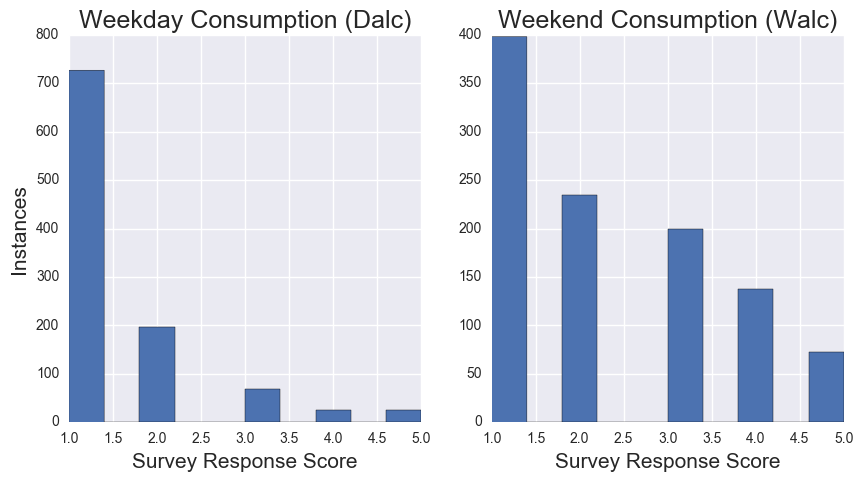

In [6]:
fig = plt.figure(figsize = (10,5))
fig.add_subplot(1,2,1)

    
df['Dalc'].hist()
plt.xlabel('Survey Response Score', fontsize = 15)
plt.ylabel('Instances', fontsize = 15)
plt.title('Weekday Consumption (Dalc)', fontsize = 18)


fig.add_subplot(1,2,2)
df['Walc'].hist()
plt.xlabel('Survey Response Score', fontsize = 15)
plt.title('Weekend Consumption (Walc)', fontsize = 18)


### Split the samples into train/test

In [7]:
X = df.drop(['Dalc', 'Walc', 'Walc_bin', 'Dalc_bin'], axis = 1)
y = df[['Dalc', 'Walc', 'Walc_bin', 'Dalc_bin']]
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2)

### Naive Bayes

Dalc Accuracy: 0.650717703349
Dalc Recall: 0.327868852459
Dalc Precision: 0.384615384615
Dalc F1 Score: 0.353982300885

Walc Accuracy: 0.77033492823
Walc Recall: 0.148936170213
Walc Precision: 0.466666666667
Walc F1 Score : 0.225806451613


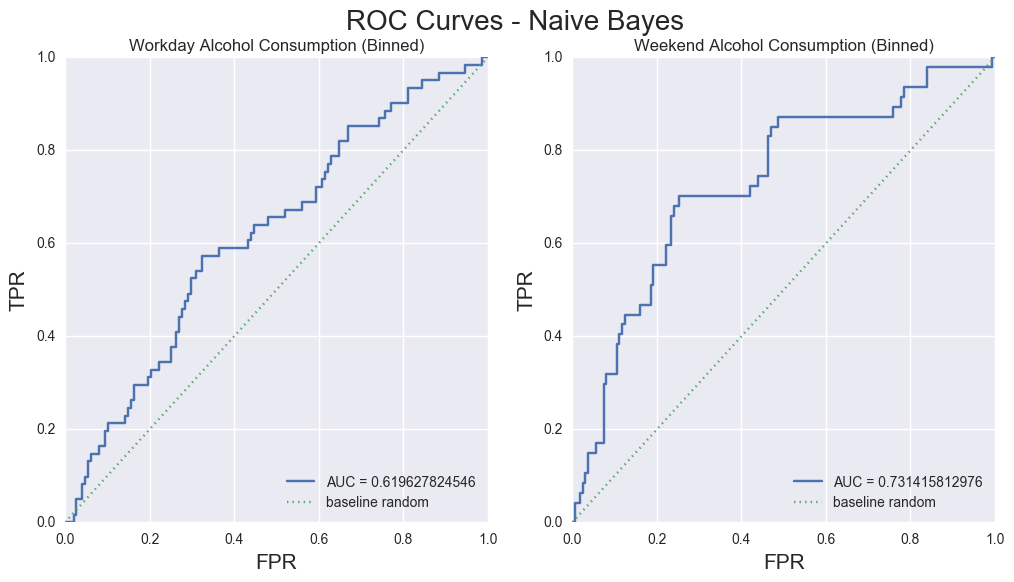

In [8]:
fig = plt.figure(figsize = (12,6))

fig.add_subplot(1,2,1)
lr = BernoulliNB()
lr.fit(X_train, y_train.Dalc_bin)
pred_Dalc = lr.predict_proba(X_test)
pred_D = lr.predict(X_test)
print('Dalc Accuracy: ' + str(lr.score(X_test, y_test.Dalc_bin)))
print('Dalc Recall: ' + str(metrics.recall_score(y_test.Dalc_bin, pred_D)))
print('Dalc Precision: ' + str(metrics.precision_score(y_test.Dalc_bin, pred_D)))
print('Dalc F1 Score: ' + str(metrics.f1_score(y_test.Dalc_bin, pred_D)) + '\n')

fpr_Dalc, tpr_Dalc, thresholds_Dalc = metrics.roc_curve(y_test.Dalc_bin, pred_Dalc[:,1])
auc_lr_Dalc = metrics.roc_auc_score(y_test.Dalc_bin, pred_Dalc[:,1])

plt.plot(fpr_Dalc,tpr_Dalc,label='AUC = ' + str(auc_lr_Dalc))
plt.plot(fpr_Dalc,fpr_Dalc,':', label='baseline random')
plt.xlabel('FPR', fontsize = 15)
plt.ylabel('TPR', fontsize = 15)
plt.title('Workday Alcohol Consumption (Binned)', fontsize = 12)
plt.legend(loc = 4)


fig.add_subplot(1,2,2)
lr = BernoulliNB()
lr.fit(X_train, y_train.Walc_bin)
pred_Walc = lr.predict_proba(X_test)
pred_W = lr.predict(X_test)
print('Walc Accuracy: ' + str(lr.score(X_test, y_test.Walc_bin)))
print('Walc Recall: ' + str(metrics.recall_score(y_test.Walc_bin, pred_W)))
print('Walc Precision: ' + str(metrics.precision_score(y_test.Walc_bin, pred_W)))
print('Walc F1 Score : ' + str(metrics.f1_score(y_test.Walc_bin, pred_W)))

fpr_Walc, tpr_Walc, thresholds_Walc = metrics.roc_curve(y_test.Walc_bin, pred_Walc[:,1])
auc_lr_Walc = metrics.roc_auc_score(y_test.Walc_bin, pred_Walc[:,1])

plt.plot(fpr_Walc,tpr_Walc,label='AUC = ' + str(auc_lr_Walc))
plt.plot(fpr_Walc,fpr_Walc,':', label='baseline random')
plt.xlabel('FPR', fontsize = 15)
plt.ylabel('TPR', fontsize = 15)
plt.title('Weekend Alcohol Consumption (Binned)', fontsize = 12)
plt.legend(loc = 4)
fig.suptitle('ROC Curves - Naive Bayes', fontsize = 20)

### Optimize Naive Bayes Parameters:

In [9]:
def xValLR_f1_NB(X, Y, k, alphas):
    from sklearn.cross_validation import KFold
    
    kfolds = KFold(X.shape[0], n_folds=k)
    f1s = {}
    
    for a in alphas:
        f1_c = []
        for train, test in kfolds:
            lr = BernoulliNB(alpha=a, fit_prior=False)
            lr.fit(X.iloc[train, :], Y.iloc[train])
            pred = lr.predict(X.iloc[test,:])
            f1_c_k = metrics.f1_score(Y.iloc[test], pred)
            f1_c.append(f1_c_k)
    
        f1s[str(a)] = f1_c 
    return f1s

C:\Users\parth\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


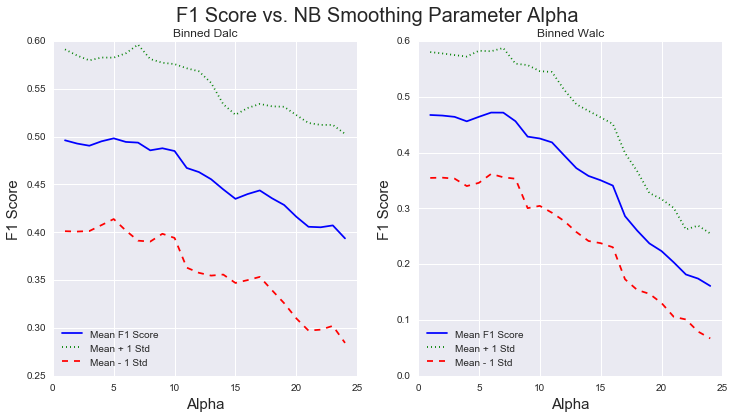

In [9]:
alphas = range(1,25)
fig = plt.figure(figsize = (12,6))
fig.add_subplot(1,2,1)
f1s = xValLR_f1_NB(X_train,y_train.Dalc_bin, 10, alphas)
mus = []
mu_plus = []
mu_minus = []
for a in alphas:
    mu = np.array(f1s[str(a)]).mean()
    sig = np.array(f1s[str(a)]).std()
    
    mu_p = mu + sig
    mu_m = mu - sig
    mus.append(mu)
    mu_plus.append(mu_p)
    mu_minus.append(mu_m)
    
plt.plot(np.array(alphas), mus, 'b', label = 'Mean F1 Score')
plt.plot(np.array(alphas), mu_plus, 'g:', label = 'Mean + 1 Std')
plt.plot(np.array(alphas), mu_minus, 'r--', label = 'Mean - 1 Std')
plt.xlabel('Alpha', fontsize = 15)
plt.ylabel('F1 Score', fontsize = 15)
plt.title('Binned Dalc', fontsize = 12)
plt.legend(loc = 3)

fig.add_subplot(1,2,2)
f1s = xValLR_f1_NB(X_train,y_train.Walc_bin, 10, alphas)
mus = []
mu_plus = []
mu_minus = []
for a in alphas:
    mu = np.array(f1s[str(a)]).mean()
    sig = np.array(f1s[str(a)]).std()
    
    mu_p = mu + sig
    mu_m = mu - sig
    mus.append(mu)
    mu_plus.append(mu_p)
    mu_minus.append(mu_m)

plt.plot(np.array(alphas), mus, 'b', label = 'Mean F1 Score')
plt.plot(np.array(alphas), mu_plus, 'g:', label = 'Mean + 1 Std')
plt.plot(np.array(alphas), mu_minus, 'r--', label = 'Mean - 1 Std')
plt.xlabel('Alpha', fontsize = 15)
plt.ylabel('F1 Score', fontsize = 15)
plt.title('Binned Walc', fontsize = 12)
plt.legend(loc = 3)

fig.suptitle('F1 Score vs. NB Smoothing Parameter Alpha', fontsize = 20)

Dalc Accuracy: 0.617224880383
Dalc Recall: 0.573770491803
Dalc Precision: 0.393258426966
Dalc F1 Score: 0.466666666667

Walc Accuracy: 0.684210526316
Walc Recall: 0.702127659574
Walc Precision: 0.388235294118
Walc F1 Score : 0.5


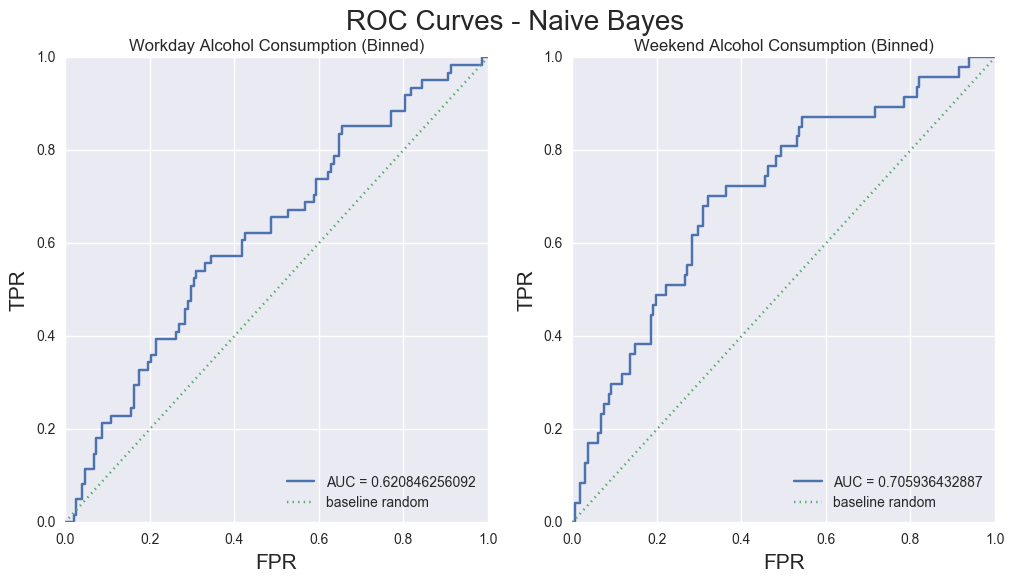

In [11]:
fig = plt.figure(figsize = (12,6))

fig.add_subplot(1,2,1)
lr = BernoulliNB(alpha=5,fit_prior=False)
lr.fit(X_train, y_train.Dalc_bin)
pred_Dalc = lr.predict_proba(X_test)
pred_D = lr.predict(X_test)
print('Dalc Accuracy: ' + str(lr.score(X_test, y_test.Dalc_bin)))
print('Dalc Recall: ' + str(metrics.recall_score(y_test.Dalc_bin, pred_D)))
print('Dalc Precision: ' + str(metrics.precision_score(y_test.Dalc_bin, pred_D)))
print('Dalc F1 Score: ' + str(metrics.f1_score(y_test.Dalc_bin, pred_D)) + '\n')

fpr_Dalc, tpr_Dalc, thresholds_Dalc = metrics.roc_curve(y_test.Dalc_bin, pred_Dalc[:,1])
auc_lr_Dalc = metrics.roc_auc_score(y_test.Dalc_bin, pred_Dalc[:,1])

plt.plot(fpr_Dalc,tpr_Dalc,label='AUC = ' + str(auc_lr_Dalc))
plt.plot(fpr_Dalc,fpr_Dalc,':', label='baseline random')
plt.xlabel('FPR', fontsize = 15)
plt.ylabel('TPR', fontsize = 15)
plt.title('Workday Alcohol Consumption (Binned)', fontsize = 12)
plt.legend(loc = 4)


fig.add_subplot(1,2,2)
lr = BernoulliNB(alpha = 7, fit_prior=False)
lr.fit(X_train, y_train.Walc_bin)
pred_Walc = lr.predict_proba(X_test)
pred_W = lr.predict(X_test)
print('Walc Accuracy: ' + str(lr.score(X_test, y_test.Walc_bin)))
print('Walc Recall: ' + str(metrics.recall_score(y_test.Walc_bin, pred_W)))
print('Walc Precision: ' + str(metrics.precision_score(y_test.Walc_bin, pred_W)))
print('Walc F1 Score : ' + str(metrics.f1_score(y_test.Walc_bin, pred_W)))

fpr_Walc, tpr_Walc, thresholds_Walc = metrics.roc_curve(y_test.Walc_bin, pred_Walc[:,1])
auc_lr_Walc = metrics.roc_auc_score(y_test.Walc_bin, pred_Walc[:,1])

plt.plot(fpr_Walc,tpr_Walc,label='AUC = ' + str(auc_lr_Walc))
plt.plot(fpr_Walc,fpr_Walc,':', label='baseline random')
plt.xlabel('FPR', fontsize = 15)
plt.ylabel('TPR', fontsize = 15)
plt.title('Weekend Alcohol Consumption (Binned)', fontsize = 12)
plt.legend(loc = 4)
fig.suptitle('ROC Curves - Naive Bayes', fontsize = 20)